In [1]:
import tensorflow as tf
import numpy as np
import glob 
import os
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices( device_type = 'GPU' )
# 设置该程序可见的GPU：写到最前面！
tf.config.experimental.set_visible_devices( devices = gpus[5:7], device_type = 'GPU' )

### 1. 导入所有文件的路径：

In [3]:
# 所有训练图片的地址：
train_path = glob.glob( '/home/gaoboyu/学习数据集/城市街景数据集/images/train/*/*' )
train_label_path = glob.glob( '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/*/*labelIds.png' )

In [4]:
train_count = len(train_path)
len(train_path), len(train_label_path)

(2975, 2975)

In [5]:
# 所有验证图片的地址：
val_path = glob.glob( '/home/gaoboyu/学习数据集/城市街景数据集/images/val/*/*' )
val_label_path = glob.glob( '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/*/*labelIds.png' )

In [6]:
val_count = len(val_path)
len(val_path), len(val_label_path)

(500, 500)

In [7]:
# 抽查 “训练数据” 是否一一对应：
train_path[912:916], train_label_path[912:916]  # 不对应！

(['/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000087_000019_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000088_000019_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000089_000019_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000090_000019_leftImg8bit.png'],
 ['/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/cologne/cologne_000080_000019_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/cologne/cologne_000078_000019_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/cologne/cologne_000077_000019_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/cologne/cologne_000061_000019_gtFine_labelIds.png'])

In [8]:
# 抽查 “验证数据” 是否一一对应：
val_path[25:28], val_label_path[25:28]  # 不对应！

(['/home/gaoboyu/学习数据集/城市街景数据集/images/val/frankfurt/frankfurt_000000_011461_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/val/frankfurt/frankfurt_000000_011810_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/val/frankfurt/frankfurt_000000_012009_leftImg8bit.png'],
 ['/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/frankfurt/frankfurt_000001_037705_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/frankfurt/frankfurt_000000_020215_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/frankfurt/frankfurt_000001_007285_gtFine_labelIds.png'])

In [9]:
# 将数据与标签调整到对应状态：训练数据
train_path.sort( key = lambda x:x.split('train/')[-1].split('_leftImg8bit.png')[0])
train_label_path.sort( key = lambda x:x.split('train/')[-1].split('_gtFine_labelIds.png')[0])

In [10]:
# 再次验证：
train_path[912:916], train_label_path[912:916]  # 对应！

(['/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000087_000019_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000088_000019_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000089_000019_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/train/dusseldorf/dusseldorf_000090_000019_leftImg8bit.png'],
 ['/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/dusseldorf/dusseldorf_000087_000019_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/dusseldorf/dusseldorf_000088_000019_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/dusseldorf/dusseldorf_000089_000019_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/train/dusseldorf/dusseldorf_000090_000019_gtFine_labelIds.png'])

In [11]:
# 将数据与标签调整到对应状态：训练数据
val_path.sort( key = lambda x:x.split('train/')[-1].split('_leftImg8bit.png')[0])
val_label_path.sort( key = lambda x:x.split('train/')[-1].split('_gtFine_labelIds.png')[0])

In [12]:
# 抽查 “验证数据” 是否一一对应：
val_path[25:28], val_label_path[25:28]  # 对应！

(['/home/gaoboyu/学习数据集/城市街景数据集/images/val/frankfurt/frankfurt_000000_011461_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/val/frankfurt/frankfurt_000000_011810_leftImg8bit.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/images/val/frankfurt/frankfurt_000000_012009_leftImg8bit.png'],
 ['/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/frankfurt/frankfurt_000000_011461_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/frankfurt/frankfurt_000000_011810_gtFine_labelIds.png',
  '/home/gaoboyu/学习数据集/城市街景数据集/gtFine/val/frankfurt/frankfurt_000000_012009_gtFine_labelIds.png'])

In [13]:
# 训练数据的乱序：
index = np.random.permutation( train_count )
train_path = np.array(train_path)[index]
train_label_path = np.array(train_label_path)[index]

### 2. 创建数据集：

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices( (train_path, train_label_path) )
val_dataset = tf.data.Dataset.from_tensor_slices( (val_path, val_label_path) )

In [15]:
train_dataset, val_dataset

(<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>,
 <TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>)

### 3. 预处理函数：

In [16]:
# 读取图片：3通道
def read_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels = 3)
    return img

In [17]:
# 读取标签：1通道（每个像素都是标签值）
def read_label(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels = 1)
    return img

In [18]:
# 对训练数据及标签：随机裁剪 + 随机翻转
# 在280x280范围内随机裁256x256更具代表性！—— 然后再直接随机翻转！
def crop_flip(img, label):
    img_label = tf.concat( [img, label], axis = -1 )  # 图像与标签合并
    img_label = tf.image.resize( img_label, [280,280], method = tf.image.ResizeMethod.NEAREST_NEIGHBOR ) 
    img_label = tf.image.random_crop( img_label, size = [256,256,4] )  # 随机裁剪：所有图像、标签都会变成(256,256,4)
    img_label = tf.image.random_flip_left_right(img_label)  # 随机左右翻转
    img_label = tf.image.random_flip_up_down(img_label)     # 随机上下翻转
    return img_label[:,:,0:3], img_label[:,:,3:]

In [19]:
# 所有图像归一化 + 标签转数据类型：
def normal(img, label):
    img = tf.cast(img, tf.float32) / 127.5 - 1
    label = tf.cast(label, tf.int32)  # 不能减1，因为里面本身就有0的标签！ 
    return img, label

In [20]:
# 训练数据加载：需要裁减！
def load_train_image(img_path, label_path):
    # 获取图片与标签：
    img = read_image(img_path)
    label = read_label(label_path)
    # 预处理：里面自带裁减！
    img, label = crop_flip(img, label)
    # 返回归一化：
    return normal(img, label)

# 验证数据加载：不需要图像增强！
def load_val_image(img_path, label_path):
    # 获取图片与标签：
    img = read_image(img_path)
    label = read_label(label_path)
    # 裁减：
    img = tf.image.resize(img, [256,256])
    label = tf.image.resize(label, [256,256])
    # 返回归一化：
    return normal(img, label)

In [21]:
# 将数据应用于函数：
AUTOTUNE = tf.data.experimental.AUTOTUNE   # 多线程加载：图像加载是cpu处理的，cpu可以做多线程！

train_dataset = train_dataset.map( load_train_image, num_parallel_calls = AUTOTUNE )
val_dataset = val_dataset.map( load_val_image, num_parallel_calls = AUTOTUNE )

In [22]:
train_dataset, val_dataset

(<ParallelMapDataset shapes: ((256, 256, 3), (256, 256, 1)), types: (tf.float32, tf.int32)>,
 <ParallelMapDataset shapes: ((256, 256, 3), (256, 256, 1)), types: (tf.float32, tf.int32)>)

In [23]:
# 乱序、划分数据集：
# cashe()：新操作，文件不断放到缓存中，加速！
# prefetch()：新操作，GPU内存不等待，不断预处理图片
BATCH_SIZE = 16
train_dataset = train_dataset.cache().shuffle(train_count).repeat().batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_dataset = val_dataset.cache().batch(BATCH_SIZE)

In [24]:
train_dataset, val_dataset

(<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.int32)>)

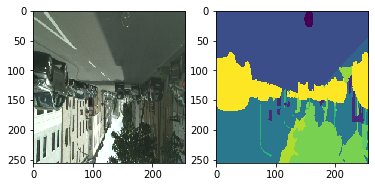

In [25]:
# 画图最后查看一下：从tf.data.Dataset拿出的数据，都是Tensor的！而matplotlib中的绘图必须是array的！
# 不能放在这里，现在train_dataset里面都是地址！
for image, label in train_dataset.take(1):
    plt.subplot(1,2,1) 
    plt.imshow( (image[0].numpy() + 1)/2 )  # 从[-1,1]转到[0,1]
    plt.subplot(1,2,2)
    plt.imshow( label[0].numpy().reshape(256,256) )

### 4. 自定义网络搭建：

In [26]:
# 以后把模型的自定义，都写到一个函数里 正规！—— 没有输入数据，返回一个模型！—— 层的生成，完全可以用循环！
def create_model():
    inputs = tf.keras.layers.Input( shape = (256,256,3) )  # 所有的层都是大写的！所有这也是一个层！
    
    # 前半部分卷积基自定义：顺序连接 + 用名字获得某层输出
    # 第一部分：_1
    conv2d_1_1 = tf.keras.layers.Conv2D( 64, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_1_1' )(inputs)
    bn_1_1 = tf.keras.layers.BatchNormalization( name = 'bn_1_1' )(conv2d_1_1)
    conv2d_1_2 = tf.keras.layers.Conv2D( 64, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_1_2' )(bn_1_1)
    bn_1_2 = tf.keras.layers.BatchNormalization( name = 'bn_1_2' )(conv2d_1_2)  # 256 x 256 x 64 √
    maxpool_1_1 = tf.keras.layers.MaxPooling2D( name = 'maxpool_1_1' )(bn_1_2)  # 128 x 128 x 64
    
    # 第二部分：_2
    conv2d_2_1 = tf.keras.layers.Conv2D( 128, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_2_1' )(maxpool_1_1)
    bn_2_1 = tf.keras.layers.BatchNormalization( name = 'bn_2_1' )(conv2d_2_1)
    conv2d_2_2 = tf.keras.layers.Conv2D( 128, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_2_2' )(bn_2_1)
    bn_2_2 = tf.keras.layers.BatchNormalization( name = 'bn_2_2' )(conv2d_2_2)  # 128 x 128 x 128 √
    maxpool_2_1 = tf.keras.layers.MaxPooling2D( name = 'maxpool_2_1' )(bn_2_2)  # 64 x 64 x 128
    
    # 第三部分：_3
    conv2d_3_1 = tf.keras.layers.Conv2D( 256, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_3_1' )(maxpool_2_1)
    bn_3_1 = tf.keras.layers.BatchNormalization( name = 'bn_3_1' )(conv2d_3_1)
    conv2d_3_2 = tf.keras.layers.Conv2D( 256, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_3_2' )(bn_3_1)
    bn_3_2 = tf.keras.layers.BatchNormalization( name = 'bn_3_2' )(conv2d_3_2)  # 64 x 64 x 256 √
    maxpool_3_1 = tf.keras.layers.MaxPooling2D( name = 'maxpool_3_1' )(bn_3_2)  # 32 x 32 x 256
    
    # 第四部分：_4
    conv2d_4_1 = tf.keras.layers.Conv2D( 512, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_4_1' )(maxpool_3_1)
    bn_4_1 = tf.keras.layers.BatchNormalization( name = 'bn_4_1' )(conv2d_4_1)
    conv2d_4_2 = tf.keras.layers.Conv2D( 512, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_4_2' )(bn_4_1)
    bn_4_2 = tf.keras.layers.BatchNormalization( name = 'bn_4_2' )(conv2d_4_2)  # 32 x 32 x 512 √
    maxpool_4_1 = tf.keras.layers.MaxPooling2D( name = 'maxpool_4_1' )(bn_4_2)  # 16 x 16 x 512  
    
    # 第五部分：_5 —— 最后没下采样！
    conv2d_5_1 = tf.keras.layers.Conv2D( 1024, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_5_1' )(maxpool_4_1)
    bn_5_1 = tf.keras.layers.BatchNormalization( name = 'bn_5_1' )(conv2d_5_1)
    conv2d_5_2 = tf.keras.layers.Conv2D( 1024, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_5_2' )(bn_5_1)
    bn_5_2 = tf.keras.layers.BatchNormalization( name = 'bn_5_2' )(conv2d_5_2)  # 16 x 16 x 1024
    
    
    # 后半部分自定义：反卷积 + 跳接（带√的）
    
    # 第一部分：x1、x2
    # 上采样：上采用的卷积核是(2,2)
    x1 = tf.keras.layers.Conv2DTranspose( 512, (2,2), strides = 2, activation = 'relu', padding = 'same', name = 'x1')(bn_5_2)
    bn_x1 = tf.keras.layers.BatchNormalization( name = 'bn_x1' )(x1)  # 32 x 32 x 512
    # 跳接合并：当成一个层！
    x2 = tf.concat( [bn_x1, bn_4_2], axis = -1 )  # 32 x 32 x (512+512) = 32 x 32 x 1024
    conv2d_x2_1 = tf.keras.layers.Conv2D( 512, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x2_1' )(x2)
    bn_x2_1 = tf.keras.layers.BatchNormalization( name = 'bn_x2_1' )(conv2d_x2_1)
    conv2d_x2_2 = tf.keras.layers.Conv2D( 512, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x2_2' )(bn_x2_1)
    bn_x2_2 = tf.keras.layers.BatchNormalization( name = 'bn_x2_2' )(conv2d_x2_2)  # 32 x 32 x 512
    
    # 第二部分：x3、x4
    # 上采样：上采用的卷积核是(2,2)
    x3 = tf.keras.layers.Conv2DTranspose( 256, (2,2), strides = 2, activation = 'relu', padding = 'same', name = 'x3')(bn_x2_2)
    bn_x3 = tf.keras.layers.BatchNormalization( name = 'bn_x3' )(x3)  # 64 x 64 x 256
    # 跳接合并：当成一个层！
    x4 = tf.concat( [bn_x3, bn_3_2], axis = -1 )  # 64 x 64 x (256+256) = 64 x 64 x 512
    conv2d_x4_1 = tf.keras.layers.Conv2D( 256, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x4_1' )(x4)
    bn_x4_1 = tf.keras.layers.BatchNormalization( name = 'bn_x4_1' )(conv2d_x4_1)
    conv2d_x4_2 = tf.keras.layers.Conv2D( 256, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x4_2' )(bn_x4_1)
    bn_x4_2 = tf.keras.layers.BatchNormalization( name = 'bn_x4_2' )(conv2d_x4_2)  # 64 x 64 x 256
    
    # 第三部分：x5、x6
    # 上采样：上采用的卷积核是(2,2)
    x5 = tf.keras.layers.Conv2DTranspose( 128, (2,2), strides = 2, activation = 'relu', padding = 'same', name = 'x5')(bn_x4_2)
    bn_x5 = tf.keras.layers.BatchNormalization( name = 'bn_x5' )(x5)  # 128 x 128 x 128
    # 跳接合并：当成一个层！
    x6 = tf.concat( [bn_x5, bn_2_2], axis = -1 )  # 128 x 128 x (128+128) = 128 x 128 x 256
    conv2d_x6_1 = tf.keras.layers.Conv2D( 128, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x6_1' )(x6)
    bn_x6_1 = tf.keras.layers.BatchNormalization( name = 'bn_x6_1' )(conv2d_x6_1)
    conv2d_x6_2 = tf.keras.layers.Conv2D( 128, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x6_2' )(bn_x6_1)
    bn_x6_2 = tf.keras.layers.BatchNormalization( name = 'bn_x6_2' )(conv2d_x6_2)  # 128 x 128 x 128
    
    # 第四部分：x7、x8
    # 上采样：上采用的卷积核是(2,2)
    x7 = tf.keras.layers.Conv2DTranspose( 64, (2,2), strides = 2, activation = 'relu', padding = 'same', name = 'x7' )(bn_x6_2)
    bn_x7 = tf.keras.layers.BatchNormalization( name = 'bn_x7' )(x7)  # 256 x 256 x 64
    # 跳接合并：当成一个层！
    x8 = tf.concat( [bn_x7, bn_1_2], axis = -1 )  # 256 x 256 x (64+64) = 256 x 256 x 128
    conv2d_x8_1 = tf.keras.layers.Conv2D( 64, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x8_1' )(x8)
    bn_x8_1 = tf.keras.layers.BatchNormalization( name = 'bn_x8_1' )(conv2d_x8_1)
    conv2d_x8_2 = tf.keras.layers.Conv2D( 64, (3,3), padding = 'same', activation = 'relu', name = 'conv2d_x8_2' )(bn_x8_1)
    bn_x8_2 = tf.keras.layers.BatchNormalization( name = 'bn_x8_2' )(conv2d_x8_2)  # 256 x 256 x 64
    
    # 最后的通道数变为34：卷积核为(1,1)；激活函数用softmax
    # 最后输出大小：256 x 256 x 34
    output = tf.keras.layers.Conv2D(34, kernel_size = (1,1), strides = (1,1), padding = 'same', activation = 'softmax', name = 'output')(bn_x8_2)
    
    # 模型搭建：
    model = tf.keras.Model( inputs = inputs, outputs = output )
    return model 

In [27]:
model = create_model()

In [28]:
# model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1_1 (Conv2D)             (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
bn_1_1 (BatchNormalization)     (None, 256, 256, 64) 256         conv2d_1_1[0][0]                 
__________________________________________________________________________________________________
conv2d_1_2 (Conv2D)             (None, 256, 256, 64) 36928       bn_1_1[0][0]                     
______________________________________________________________________________________________

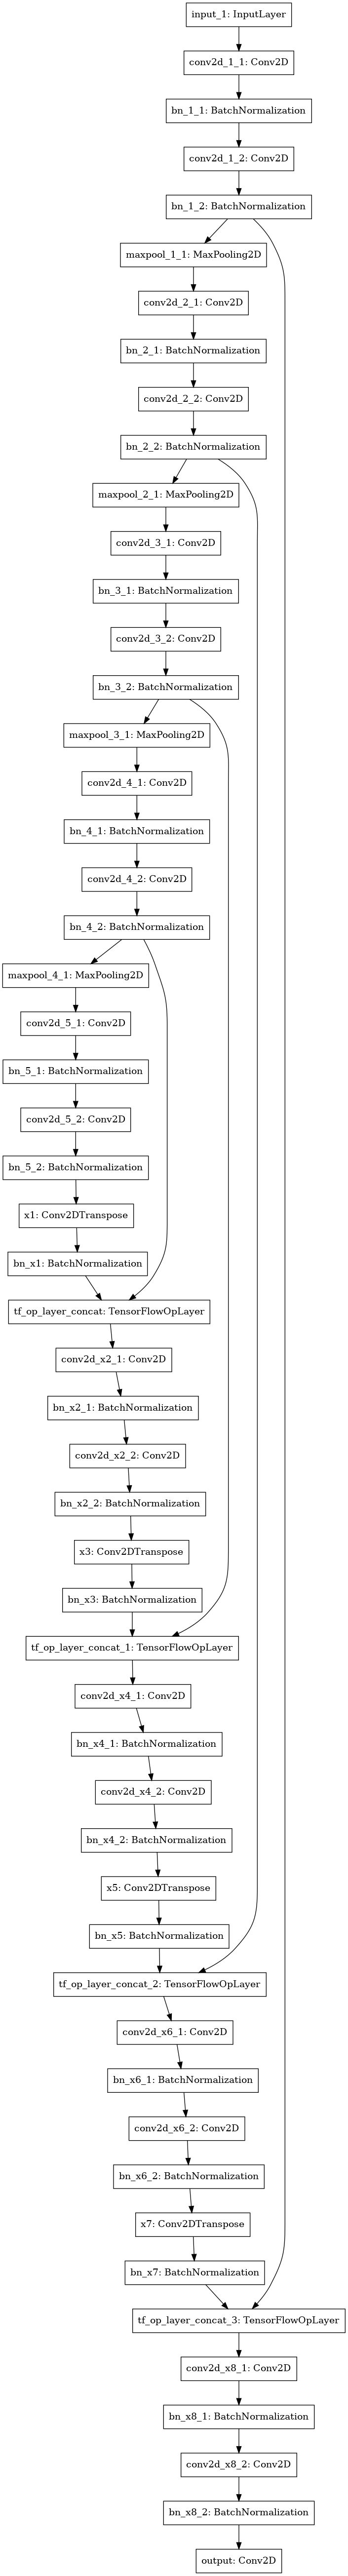

In [29]:
# # 画出网络拓扑图：
# tf.keras.utils.plot_model(model, show_shapes = False, expand_nested = False, to_file = 'Unet.png')

### 5. 模型配置与训练：

In [30]:
# class MeanIoU(tf.keras.metrics.MeanIoU):
#     def __call__(self, y_true, y_pred, sample_weight = None):
#         y_pred = tf.argmax(y_pred, axis = -1)
#         return super().__call__(y_true, y_pred, sample_weight = sample_weight)

In [31]:
# 模型编译
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    # metrics = ['acc', MeanIoU(num_classes=34)]  # 类别太多了！如果只有几个类的话，IoU的结果会非常好！
    metrics = ['acc']
    # metrics = ['acc', MeanIoU(num_classes=34)]
)

In [32]:
# 定义保存模型的回调函数：保存整个模型、只保存最好的！
# 设置保存的路径：
checkpoint_path = '/home/gaoboyu/学习保存的模型/Unet'
# 设置回调函数保存模型：没设置的参数都默认
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    monitor = 'val_acc',
    save_best_only = True  # 监控的目标：如果新的epoch结果比前一个要好，那就重新保存最新的，删掉旧的！
)

In [ ]:
# 模型训练
EPOCHES = 30
history = model.fit(
    train_dataset,
    epochs = EPOCHES,
    steps_per_epoch = train_count // BATCH_SIZE,
    validation_data = val_dataset,
    validation_steps = val_count // BATCH_SIZE,
    callbacks = [cp_callback]
)

Epoch 1/30
185/185 [==============================] - ETA: 0s - loss: 1.2114 - acc: 0.6875WARNING:tensorflow:From /usr/local/Anaconda33/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/gaoboyu/学习保存的模型/Unet/assets
185/185 [==============================] - 319s 2s/step - loss: 1.2114 - acc: 0.6875 - val_loss: 9.7155 - val_acc: 0.3286
Epoch 2/30
185/185 [==============================] - 306s 2s/step - loss: 0.8634 - acc: 0.7589 - val_loss: 4.9070 - val_acc: 0.2199
Epoch 3/30
185/185 [==============================] - 344s 2s/step - loss: 0.7855 - acc: 0.7781 - val_loss: 1.3545 - val_acc: 0.6676
Epoch 4/30
185/185 [==============================] - 314s 2s/step - loss: 0.7846 - a

### 6. 加载已训练好的模型：

In [26]:
# 模型加载：因为保存的是全体模型，所以直接直接导入即可（和导入.h5文件方式一样！）
new_model = tf.keras.models.load_model( '/home/gaoboyu/学习保存的模型/Unet' )  # 括号里写model的地址

In [27]:
new_model.evaluate( val_dataset )

32/32 [==============================] - 18s 572ms/step - loss: 0.6582 - acc: 0.8435


[0.6582072377204895, 0.8434519171714783]

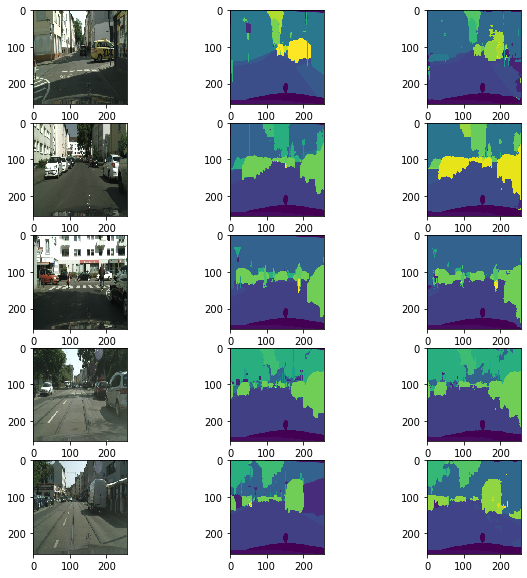

In [28]:
# 在验证数据上看效果：
num = 5 # 一次看5张效果！

for image, label_real in val_dataset.take(1):
    label_pred = new_model.predict(image)
    label_pred = tf.argmax( label_pred, axis = -1 )  # 每个维度上，取一个最大值！变成(224,224)
    
    plt.figure( figsize=(10,10) )
    # 每行3张图，从左到右：原图、真实标签图、预测标签图
    for i in range(num):
        plt.subplot(num, 3, i*3 + 1)
        plt.imshow( (image[i].numpy() + 1)/2 )
        plt.subplot(num, 3, i*3 + 2)
        plt.imshow( label_real[i].numpy().reshape(256,256) )
        plt.subplot(num, 3, i*3 + 3)
        plt.imshow( label_pred[i].numpy() )

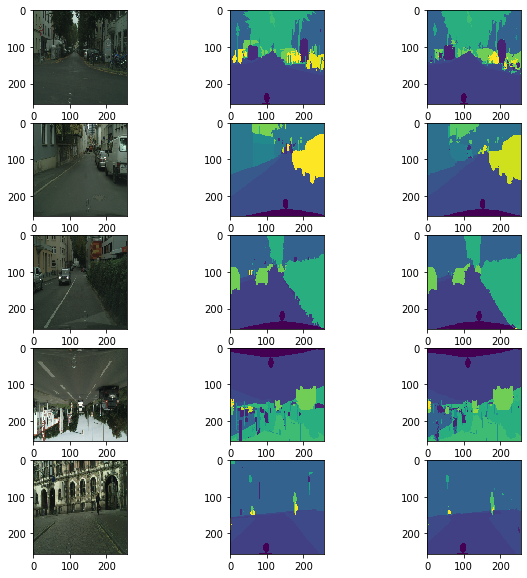

In [29]:
# 在训练数据上看效果：
num = 5 # 一次看5张效果！

for image, label_real in train_dataset.take(1):
    label_pred = new_model.predict(image)
    label_pred = tf.argmax( label_pred, axis = -1 )  # 每个维度上，取一个最大值！变成(224,224)
    
    plt.figure( figsize=(10,10) )
    # 每行3张图，从左到右：原图、真实标签图、预测标签图
    for i in range(num):
        plt.subplot(num, 3, i*3 + 1)
        plt.imshow( (image[i].numpy() + 1)/2 )
        plt.subplot(num, 3, i*3 + 2)
        plt.imshow( label_real[i].numpy().reshape(256,256) )
        plt.subplot(num, 3, i*3 + 3)
        plt.imshow( label_pred[i].numpy() )

### 7. 继续训练：

In [28]:
# # 模型编译
# new_model.compile(
#     optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
#     loss = 'sparse_categorical_crossentropy',
#     # metrics = ['acc', MeanIoU(num_classes=34)]  # 类别太多了！如果只有几个类的话，IoU的结果会非常好！
#     metrics = ['acc']
# )

In [29]:
# # 定义保存模型的回调函数：保存整个模型、只保存最好的！
# # 设置保存的路径：
# checkpoint_path = '/home/gaoboyu/学习保存的模型/Unet'
# # 设置回调函数保存模型：没设置的参数都默认
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath = checkpoint_path,
#     monitor = 'val_acc',
#     save_best_only = True  # 监控的目标：如果新的epoch结果比前一个要好，那就重新保存最新的，删掉旧的！
# )

In [30]:
# # 模型训练
# EPOCHES = 10
# history = new_model.fit(
#     train_dataset,
#     epochs = EPOCHES,
#     steps_per_epoch = train_count // BATCH_SIZE,
#     validation_data = val_dataset,
#     validation_steps = val_count // BATCH_SIZE,
#     callbacks = [cp_callback]
# )

Epoch 1/10
185/185 [==============================] - ETA: 0s - loss: 1.2932 - acc: 0.5664WARNING:tensorflow:From /usr/local/Anaconda33/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/gaoboyu/学习保存的模型/Unet/assets
185/185 [==============================] - 312s 2s/step - loss: 1.2932 - acc: 0.5664 - val_loss: 1.4368 - val_acc: 0.5326
Epoch 2/10
185/185 [==============================] - 300s 2s/step - loss: 1.2835 - acc: 0.5696 - val_loss: 1.4477 - val_acc: 0.5237
Epoch 3/10
185/185 [==============================] - 300s 2s/step - loss: 1.2783 - acc: 0.5712 - val_loss: 1.4570 - val_acc: 0.5259
Epoch 4/10
185/185 [==============================] - 307s 2s/step - loss: 1.2738 - a

KeyboardInterrupt: 